Epoch 0, Loss: 2.3311
Epoch 50, Loss: 1.9259
Epoch 100, Loss: 1.7640
Epoch 150, Loss: 1.6769
Epoch 200, Loss: 1.6274
Epoch 250, Loss: 1.5952
Epoch 300, Loss: 1.5704
Epoch 350, Loss: 1.5492
Epoch 400, Loss: 1.5303
Epoch 450, Loss: 1.5129


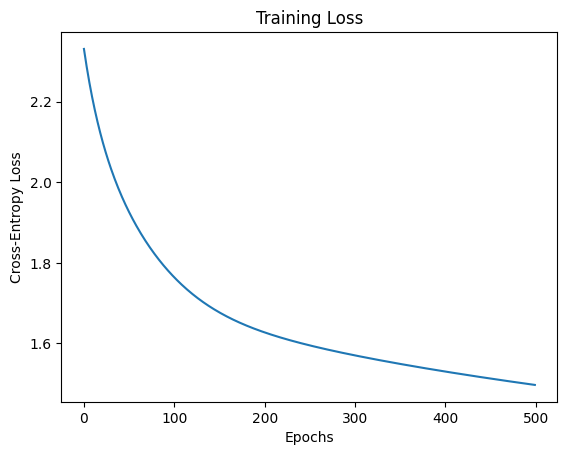


Test Accuracy: 0.3500
Precision: 0.3596, Recall: 0.3500, F1-score: 0.3504

Confusion Matrix:
[[ 6  4  3  2  2]
 [ 4  4  8  3  3]
 [ 2  5  7  4  4]
 [ 2  2  5  6  0]
 [ 2  0  5  5 12]]


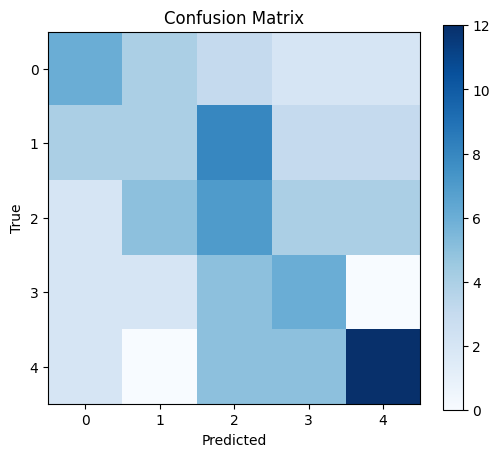

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix

np.random.seed(0)


X, y = make_classification(n_samples=500, n_features=20, n_informative=15,
                           n_redundant=5, n_classes=5, random_state=42)


def one_hot_encode(y, num_classes):
    encoded = np.zeros((len(y), num_classes))
    encoded[np.arange(len(y)), y] = 1
    return encoded

Y = one_hot_encode(y, 5)


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

class NeuralNetwork:
    def __init__(self, input_neurons, hidden1, hidden2, hidden3, output_neurons, lr=0.01):
        self.lr = lr

        self.W1 = np.random.randn(input_neurons, hidden1)
        self.W2 = np.random.randn(hidden1, hidden2)
        self.W3 = np.random.randn(hidden2, hidden3)
        self.W4 = np.random.randn(hidden3, output_neurons)


    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        return 1 / (1 + np.exp(-x))


    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / e_x.sum(axis=1, keepdims=True)

    def feedForward(self, X):
        self.z1 = self.sigmoid(np.dot(X, self.W1))
        self.z2 = self.sigmoid(np.dot(self.z1, self.W2))
        self.z3 = self.sigmoid(np.dot(self.z2, self.W3))
        self.output = self.softmax(np.dot(self.z3, self.W4))
        return self.output

    def backPropagation(self, X, Y, pred):
        m = X.shape[0]

        d_output = (pred - Y) / m


        d_W4 = np.dot(self.z3.T, d_output)
        d_z3 = np.dot(d_output, self.W4.T) * self.sigmoid(self.z3, der=True)
        d_W3 = np.dot(self.z2.T, d_z3)
        d_z2 = np.dot(d_z3, self.W3.T) * self.sigmoid(self.z2, der=True)
        d_W2 = np.dot(self.z1.T, d_z2)
        d_z1 = np.dot(d_z2, self.W2.T) * self.sigmoid(self.z1, der=True)
        d_W1 = np.dot(X.T, d_z1)


        self.W1 -= self.lr * d_W1
        self.W2 -= self.lr * d_W2
        self.W3 -= self.lr * d_W3
        self.W4 -= self.lr * d_W4

    def train(self, X, Y, epochs=500):
        loss_history = []
        for epoch in range(epochs):
            pred = self.feedForward(X)
            self.backPropagation(X, Y, pred)
            loss = -np.mean(np.sum(Y * np.log(pred + 1e-8), axis=1))
            loss_history.append(loss)
            if epoch % 50 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.4f}")
        return loss_history

    def predict(self, X):
        out = self.feedForward(X)
        return np.argmax(out, axis=1)

nn = NeuralNetwork(input_neurons=20, hidden1=64, hidden2=32, hidden3=16, output_neurons=5, lr=0.01)
loss_history = nn.train(X_train, Y_train, epochs=500)


plt.plot(loss_history)
plt.xlabel("Epochs")
plt.ylabel("Cross-Entropy Loss")
plt.title("Training Loss")
plt.show()


y_test_labels = np.argmax(Y_test, axis=1)
y_pred = nn.predict(X_test)

accuracy = accuracy_score(y_test_labels, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test_labels, y_pred, average='weighted')
cm = confusion_matrix(y_test_labels, y_pred)

print(f"\nTest Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}, Recall: {recall:.4f}, F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

plt.figure(figsize=(6,5))
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.colorbar()
plt.show()
